In [212]:
import pandas as pd
import numpy as np
import seaborn as sns

# BrainStation DataScience Course Project

## Jorge Garciadiego

The Objective of this project is to develop a ML based model for the prediction The likehood of a customer to suscribe to a new banking priduct <font color=salmon>(Term Deopsit)</font>

The dataset provided contains records of marketing campaings for similar products. Some clients had been contacted more than once in order to know if the product would be subscribed or not &#x27A9; this is `important`, since there would be more than one record for the same person.

DataSet name: `full.csv` <br>
location: `data/`

In [327]:
raw_data = pd.read_csv('data/full.csv')

In [288]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### <font color=#adf7b6>Input Variables</font>

<font size= 3px color=#ffee93>&#x27AB;</font> Input Variables <font size= 3px color=#ffee93>&#x27AD;</font> Bank Client data <br>

<font color=#ffee93>&#x27AD;These columns describe the Client attributes</font><br>

<font size= 3px color=#ffee93>1 &#x27AD;</font> age <font color=#adf7b6>(numeric)</font><br>
<font size= 3px color=#ffee93>2 &#x27AD;</font> job : type of job (<font color=#adf7b6>categorical</font>`: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'`)<br>
<font size= 3px color=#ffee93>3 &#x27AD;</font> marital : marital status (<font color=#adf7b6>categorical</font>`: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed`)<br>
<font size= 3px color=#ffee93>4 &#x27AD;</font> education (<font color=#adf7b6>categorical</font>`: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'`)<br>
<font size= 3px color=#ffee93>5 &#x27AD;</font> default: has credit in default? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>
<font size= 3px color=#ffee93>6 &#x27AD;</font> housing: has housing loan? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>
<font size= 3px color=#ffee93>7 &#x27AD;</font> loan: has personal loan? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>

In [21]:
client_data = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

In [29]:
raw_data.loc[:, client_data].head(10)

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
5,45,services,married,basic.9y,unknown,no,no
6,59,admin.,married,professional.course,no,no,no
7,41,blue-collar,married,unknown,unknown,no,no
8,24,technician,single,professional.course,no,yes,no
9,25,services,single,high.school,no,yes,no


In [25]:
raw_data.loc[:, client_data].describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [26]:
raw_data.loc[:, client_data].describe(include=[object])

,job,marital,education,default,housing,loan
count,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3
top,admin.,married,university.degree,no,yes,no
freq,10422,24928,12168,32588,21576,33950


### <font color=#adf7b6> Variables related with the last contact of the current campaign </font>

<font size= 3px color=#ffee93>8 &#x27AD;</font>- contact: contact communication type (<font color=#adf7b6>categorical</font>: `'cellular','telephone'`)<br>
<font size= 3px color=#ffee93>9 &#x27AD;</font>- month: last contact month of year (<font color=#adf7b6>categorical</font>: `'jan', 'feb', 'mar', ..., 'nov', 'dec'`)<br>
<font size= 3px color=#ffee93>10 &#x27AD;</font>- day_of_week: last contact day of the week (<font color=#adf7b6>categorical</font>: `'mon','tue','wed','thu','fri'`)<br>
<font size= 3px color=#ffee93>11 &#x27AD;</font>- duration: last contact duration, in seconds (<font color=#adf7b6>numeric</font>). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [47]:
last_contact = ['contact', 'month', 'day_of_week', 'duration']

In [50]:
raw_data.loc[:, last_contact].describe()

,duration
count,41188.000000
mean,258.285010
std,259.279249
min,0.000000
25%,102.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [51]:
raw_data.loc[:, last_contact].describe(include=object)

,contact,month,day_of_week
count,41188,41188,41188
unique,2,10,5
top,cellular,may,thu
freq,26144,13769,8623


### <font color=#adf7b6> Other Attributes </font>
<font size= 3px color=#ffee93>12 &#x27AD;</font> campaign: number of contacts performed during this campaign and for this client (<font color=#adf7b6> numeric, includes last contact </font>)<br>
<font size= 3px color=#ffee93>13 &#x27AD;</font> pdays: number of days that passed by after the client was last contacted from a previous campaign (<font color=#adf7b6> numeric; 999 means client was not previously contacted </font>)<br>
<font size= 3px color=#ffee93>14 &#x27AD;</font> previous: number of contacts performed before this campaign and for this client (<font color=#adf7b6> numeric </font>)<br>
<font size= 3px color=#ffee93>15 &#x27AD;</font> poutcome: outcome of the previous marketing campaign (<font color=#adf7b6>categorical</font>: 'failure','nonexistent','success')<br>

In [60]:
other_attributes = ['campaign', 'pdays', 'previous', 'poutcome']

In [62]:
raw_data.loc[:, other_attributes].describe()

,campaign,pdays,previous
count,41188.000000,41188.000000,41188.000000
mean,2.567593,962.475454,0.172963
std,2.770014,186.910907,0.494901
min,1.000000,0.000000,0.000000
25%,1.000000,999.000000,0.000000
50%,2.000000,999.000000,0.000000
75%,3.000000,999.000000,0.000000
max,56.000000,999.000000,7.000000


In [63]:
raw_data.loc[:, other_attributes].describe(include=object)

,poutcome
count,41188
unique,3
top,nonexistent
freq,35563


### <font color=#adf7b6> Social and Economic Attributes </font>

<font size= 3px color=#ffee93>16 &#x27AD;</font> <font color=#52b2cf>emp.var.rate</font>: employment variation rate - quarterly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>17 &#x27AD;</font> <font color=#52b2cf>cons.price.idx</font>: consumer price index - monthly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>18 &#x27AD;</font> <font color=#52b2cf>cons.conf.idx</font>: consumer confidence index - monthly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>19 &#x27AD;</font> <font color=#52b2cf>euribor3m</font>: euribor 3 month rate - daily indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>20 &#x27AD;</font> <font color=#52b2cf>nr.employed</font>: number of employees - quarterly indicator (<font color=#adf7b6>numeric</font>)<br>

In [64]:
economic_attributes = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [65]:
raw_data.loc[:, economic_attributes].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> Formating<br>
<font color=#84dcc6>&#x2730;</font> Outliers<br>
<font color=#84dcc6>&#x2730;</font> <font color=#ff9770>Missing Data</font><br>
<font color=#84dcc6>&#x2730;</font> Extra Data<br>
<font color=#84dcc6>&#x2730;</font> Repeated data/indices<br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

In [67]:
raw_data.loc[:, client_data].head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [73]:
raw_data.loc[:,client_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


In [74]:
raw_data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [76]:
raw_data.shape

(41188, 21)

In [80]:
for column in raw_data.loc[:,client_data]:
  print('Column: {} - size: {}'.format(column, raw_data[column].size))

Column: age - size: 41188
Column: job - size: 41188
Column: marital - size: 41188
Column: education - size: 41188
Column: default - size: 41188
Column: housing - size: 41188
Column: loan - size: 41188


At first sight all the raw_data columns have a piece of data in their columns, but we need to see if all that data is miningful 

In [85]:
raw_data.sort_values(by='age', ascending=False).age.unique()

array([98, 95, 94, 92, 91, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44,
       43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27,
       26, 25, 24, 23, 22, 21, 20, 19, 18, 17])

the `age` column has data relativly significative, however there are some occurrences over 90 year and below 18

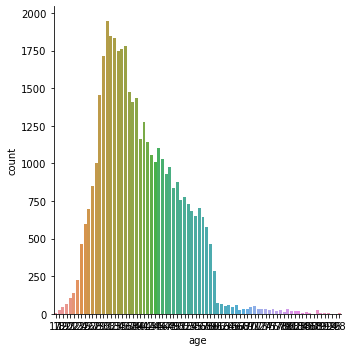

In [213]:
sns.catplot(data=raw_data, x='age', kind='count')

In [153]:
raw_data.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

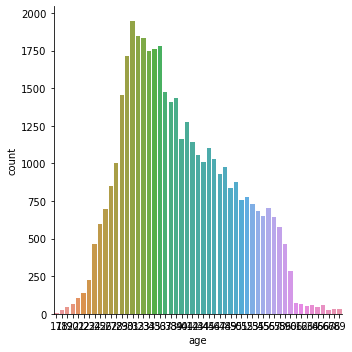

In [214]:
sns.catplot(data=raw_data[raw_data['age'] < 70], x= 'age', kind='count')

In [155]:
raw_data[raw_data['age'] < 70].age.describe()

count    40719.000000
mean        39.599008
std          9.674971
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

In [157]:
raw_data[raw_data['age'] > 69].age.describe()

count    469.000000
mean      76.927505
std        5.760078
min       70.000000
25%       72.000000
50%       76.000000
75%       81.000000
max       98.000000
Name: age, dtype: float64

In [176]:
# % of Rows with age > 69
print((raw_data[raw_data.age > 69].age.count() / raw_data[raw_data.age < 70].age.count()) *100)

1.1517964586556644


## <font color=#52b2cf>Insigt</font>

Loocking the age variable by it self seems that the there are some extreme left and right values, however taking those values out does not have an impact on the metrics, occurrencies with an `age` greater than 69 are just `1%` of the dataset and they could have meaningful data on the other columns.

All of our Client Data has missing values represented as <font color=#ffee93>unknown</font>

In [184]:
missing_sum = 0

for column in raw_data.loc[:,client_data]:
  missing_in_column = raw_data[raw_data[column] == 'unknown'][column].count()
  missing_sum += missing_in_column
  print('{} -> {} missing values'.format(column, missing_in_column))

print('\nOf {} rows in the dataset has a total of {} occurrencies of missing values'\
  .format(len(raw_data), missing_sum, round(missing_sum/len(raw_data)*100)))

age -> 0 missing values
job -> 330 missing values
marital -> 80 missing values
education -> 1731 missing values
default -> 8597 missing values
housing -> 990 missing values
loan -> 990 missing values

Of 41188 rows in the dataset has a total of 12718 occurrencies of missing values


In [185]:
8597/41188

0.20872584247839177

Clearly there are to many rows with missing values and we cannot get rid of them because:

* We don't know were those missing values are if they concide in the same row or they standalone in a row
* If we drop for example all the rows with missing values in the `default` column we'll be lossing almost 21% of the rows

This means that we need to run deeper analysis to understand the missing values and identify if there is a possibility of filling them or drop them out

In [203]:
'''
 Since our missing data is represented as unknown we need to tell pandas that those are our missing
 values, lets replace them with nan
'''
raw_data_na = raw_data.replace('unknown', np.nan)

In [209]:
''' 
Now lets see the size of the dataset if we just drop all the rows with missing values
'''

raw_data_na.dropna(thresh=raw_data_na.shape[1], axis=0)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [210]:
1 - (30488/len(raw_data_na))

0.2597844032242401

## <font color=#52b2cf>Insight</font>

if we preserve only the rows that does not contain any <font color=#ffee93>unknown</font> or <font color=#ffee93>nan</font> we would be lossing near 26% of the records

<AxesSubplot:>

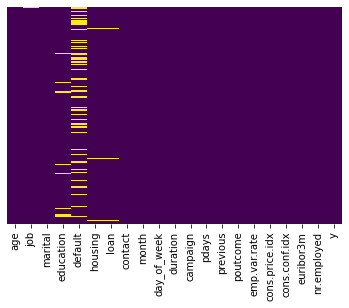

In [218]:
sns.heatmap(raw_data_na.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## <font color=#52b2cf>Insight</font>

the `Default` column has three types of values <font color=#9cadce>[yes, no, unknown]</font> but the hole dataset has only three occurrences of <font color=#9cadce>'yes'</font> this could mean there was an error at capturing the data or that in the first place people with default credit were no subject of these campaigns or that maybe these 3 observations occured after the previous campaign, however, the precesence of <font color=#9cadce>8597 'unknown'</font> values could mean tha that information was not available at the time or not gather.

<font color=#61f4de>&#x27AD;</font> At this point it could be more meaningful use the <font color=#9cadce>unknown</font> values as a categorical value than the 3 obserbations with <font color=#9cadce>yes</font>

In [237]:
raw_data[raw_data['default'] == 'yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [246]:
raw_data[raw_data['default']=='unknown'].groupby(['default', 'housing', 'loan']).count()

age   job  marital  education  contact  month  \
default housing loan                                                      
unknown no      no       3457  3457     3457       3457     3457   3457   
                yes       549   549      549        549      549    549   
        unknown unknown   227   227      227        227      227    227   
        yes     no       3641  3641     3641       3641     3641   3641   
                yes       723   723      723        723      723    723   

                         day_of_week  duration  campaign  pdays  previous  \
default housing loan                                                        
unknown no      no              3457      3457      3457   3457      3457   
                yes              549       549       549    549       549   
        unknown unknown          227       227       227    227       227   
        yes     no              3641      3641      3641   3641      3641   
                yes              723       723       723    723       723   

                         poutcome  emp.var.rate  cons.price.idx  \
default housing loan                                              
unknown no      no           3457          3457            3457   
                yes           549           549             549   
        unknown unknown       227           227             227   
        yes     no           3641          3641            3641   
                yes           723           723             723   

                         cons.conf.idx  euribor3m  nr.employed     y  
default housing loan                                                  
unknown no      no                3457       3457         3457  3457  
                yes                549        549          549   549  
        unknown unknown            227        227          227   227  
        yes     no                3641       3641         3641  3641  
                yes                723        723          723   723

In [249]:
raw_data[raw_data['default']=='no'].groupby(['default', 'housing', 'loan']).count()

age    job  marital  education  contact  month  \
default housing loan                                                        
no      no      no       12606  12606    12606      12606    12606  12606   
                yes       2008   2008     2008       2008     2008   2008   
        unknown unknown    763    763      763        763      763    763   
        yes     no       14243  14243    14243      14243    14243  14243   
                yes       2968   2968     2968       2968     2968   2968   

                         day_of_week  duration  campaign  pdays  previous  \
default housing loan                                                        
no      no      no             12606     12606     12606  12606     12606   
                yes             2008      2008      2008   2008      2008   
        unknown unknown          763       763       763    763       763   
        yes     no             14243     14243     14243  14243     14243   
                yes             2968      2968      2968   2968      2968   

                         poutcome  emp.var.rate  cons.price.idx  \
default housing loan                                              
no      no      no          12606         12606           12606   
                yes          2008          2008            2008   
        unknown unknown       763           763             763   
        yes     no          14243         14243           14243   
                yes          2968          2968            2968   

                         cons.conf.idx  euribor3m  nr.employed      y  
default housing loan                                                   
no      no      no               12606      12606        12606  12606  
                yes               2008       2008         2008   2008  
        unknown unknown            763        763          763    763  
        yes     no               14243      14243        14243  14243  
                yes               2968       2968         2968   2968

In [268]:
raw_data.loc[:, ['default', 'housing', 'loan','emp.var.rate']].groupby(['default', 'housing', 'loan']).agg(['count', 'mean', 'median', 'std'])

emp.var.rate                           
                               count      mean median       std
default housing loan                                           
no      no      no             12606  0.019768   1.10  1.601134
                yes             2008  0.035209   1.10  1.608374
        unknown unknown          763 -0.098427   1.10  1.657425
        yes     no             14243 -0.171158  -0.10  1.627257
                yes             2968 -0.163309  -0.10  1.607278
unknown no      no              3457  0.768296   1.40  1.126104
                yes              549  0.821311   1.40  1.114422
        unknown unknown          227  0.825551   1.10  1.055688
        yes     no              3641  0.618237   1.10  1.262260
                yes              723  0.694882   1.10  1.182297
yes     no      no                 2  0.650000   0.65  1.060660
        yes     no                 1  1.400000   1.40       NaN

In [267]:
raw_data[raw_data['default']=='no'].groupby(['loan', 'housing']).get_group(('unknown','unknown'))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
485,36,admin.,married,university.degree,no,unknown,unknown,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
501,33,admin.,married,basic.9y,no,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
564,35,admin.,divorced,university.degree,no,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
570,49,entrepreneur,married,professional.course,no,unknown,unknown,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [248]:
raw_data['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

<AxesSubplot:xlabel='default', ylabel='count'>

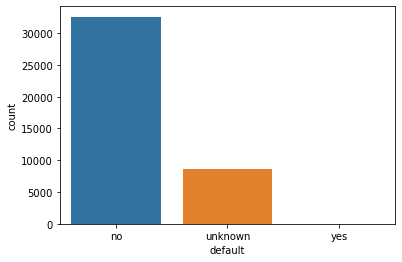

In [251]:
sns.countplot(x='default', data=raw_data)

## <font color=#ff9770>'unknown' values in default</font>

Since we found a lot of unkown values we need to implement some logit to assign values to default, the categorical values we have are 'no' with the highest frequency of 32,588, 'unkown' 8597 and 'yes' with only 3 observations.

We can't take the 'yes' observations to look for patterns, so we'll consider the following

* 3,457 unknown 'default' observations have 'no' for loan and 'no' for 'housing' therefore these obs are less likely to have a credit in default
* 227 'unknown' have 'unknown' in both loan and housing we are dropping these observations.
* The rest of the observation are 'unknown' but at these point we end up only with tow choices 'unknown' and 'no'

In [291]:
raw_data.loc[(raw_data['default']=='unknown') & (raw_data['housing']== 'unknown') & (raw_data['loan']=='unknown'),:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
470,42,technician,single,professional.course,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34618,33,blue-collar,married,basic.9y,unknown,unknown,unknown,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
34826,59,management,married,basic.4y,unknown,unknown,unknown,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
34970,42,self-employed,married,professional.course,unknown,unknown,unknown,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
37661,71,retired,married,basic.4y,unknown,unknown,unknown,cellular,aug,tue,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.859,5076.2,yes


In [328]:
# We declare a variable to hold the indexes that we want to drop
# We assign all the indexes where default, loan and housing are unknown

to_drop_indices = raw_data.loc[(raw_data['default']=='unknown') & (raw_data['housing']== 'unknown') & (raw_data['loan']=='unknown'),:].index

In [329]:
to_drop_indices

Int64Index([   29,    81,   385,   401,   470,   494,   495,   520,   549,
              569,
            ...
            33110, 33294, 33575, 33647, 33822, 34618, 34826, 34970, 37661,
            40941],
           dtype='int64', length=227)

In [330]:
# We append the rows were default is 'yes' because they are only 3 observations and look a little inconsintent 

to_drop_indices = to_drop_indices.append(raw_data.loc[raw_data['default'] == 'yes'].index)

In [331]:
raw_data.drop(to_drop_indices, inplace=True)

In [332]:
raw_data.loc[:, ['default', 'housing', 'loan','emp.var.rate']].groupby(['default', 'housing', 'loan']).agg(['count', 'mean', 'median', 'std'])

emp.var.rate                           
                               count      mean median       std
default housing loan                                           
no      no      no             12606  0.019768    1.1  1.601134
                yes             2008  0.035209    1.1  1.608374
        unknown unknown          763 -0.098427    1.1  1.657425
        yes     no             14243 -0.171158   -0.1  1.627257
                yes             2968 -0.163309   -0.1  1.607278
unknown no      no              3457  0.768296    1.4  1.126104
                yes              549  0.821311    1.4  1.114422
        yes     no              3641  0.618237    1.1  1.262260
                yes              723  0.694882    1.1  1.182297

In [337]:
# For the observations with 'no' values in housing and loan columns we are switching 'unknown' to 'no' since 

raw_data['default'].mask((raw_data['housing']=='no') & (raw_data['loan']=='no'), 'no', inplace=True)

In [341]:
raw_data.loc[:, ['default', 'housing', 'loan','emp.var.rate']].groupby(['default', 'housing', 'loan']).agg(['count', 'mean', 'median', 'std'])

emp.var.rate                           
                               count      mean median       std
default housing loan                                           
no      no      no             16063  0.180863    1.1  1.542516
                yes             2008  0.035209    1.1  1.608374
        unknown unknown          763 -0.098427    1.1  1.657425
        yes     no             14243 -0.171158   -0.1  1.627257
                yes             2968 -0.163309   -0.1  1.607278
unknown no      yes              549  0.821311    1.4  1.114422
        yes     no              3641  0.618237    1.1  1.262260
                yes              723  0.694882    1.1  1.182297

In [ ]:
### Aside

In [201]:
raw_data_na.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [202]:
raw_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [94]:
other_attrib = ['campaign', 'pdays', 'previous', 'poutcome']

In [96]:
raw_data.loc[:, other_attributes].describe()

,campaign,pdays,previous
count,41188.000000,41188.000000,41188.000000
mean,2.567593,962.475454,0.172963
std,2.770014,186.910907,0.494901
min,1.000000,0.000000,0.000000
25%,1.000000,999.000000,0.000000
50%,2.000000,999.000000,0.000000
75%,3.000000,999.000000,0.000000
max,56.000000,999.000000,7.000000


In [98]:
raw_data.loc[:, other_attributes].describe(include=object)

,poutcome
count,41188
unique,3
top,nonexistent
freq,35563


In [134]:
other_attributes_ds = raw_data.loc[:, other_attributes]

In [135]:
less_than_999 = other_attributes_ds[other_attributes_ds['pdays'] < 999]

In [136]:
less_than_999.sort_values(by='pdays', ascending=False).pdays.unique()

array([27, 26, 25, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1,  0])

In [139]:
less_than_999['days'] = less_than_999['pdays']

/var/folders/xx/hk1bd9890zv29g45x35373lr0000gn/T/ipykernel_47335/3641935448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_than_999['days'] = less_than_999['pdays']


In [140]:
less_than_999

,campaign,pdays,previous,poutcome,days
24108,1,6,1,success,6
24264,1,4,1,success,4
24279,1,4,1,success,4
24397,1,3,1,success,3
24482,2,4,1,success,4
...,...,...,...,...,...
41163,3,4,2,success,4
41164,2,10,1,success,10
41174,1,1,6,success,1
41178,2,6,3,success,6


In [146]:
less_than_999.days.value_counts().sort_values()

20      1
26      1
25      1
27      1
21      2
19      3
22      3
18      7
17      8
16     11
0      15
8      18
14     20
15     24
1      26
11     28
13     36
5      46
10     52
12     58
7      60
2      61
9      64
4     118
6     412
3     439
Name: days, dtype: int64

In [147]:
raw_data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [ ]:
f_data.loc[(f_data['pdays'] >= 999) & (f_data['previous'] != 0), :]